#Apellido, Nombre, DNI, email de todos los integrantes del grupo


Cammarata, Franco, 34904203

Cabrera, Ivanna Mailen, 39241303

Ahumada, Brian, 38335339

Banegas, María Belén, 38482323

Villasmil, Mairene, 96126908

Coronel, Alvaro Facundo, 38643314

Medina, Javier, 28924027

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.dates as mdates


from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')


df_temperaturas = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/registro_temperatura365d_smn (1).csv')

df_temperaturas.info

Mounted at /content/drive


<bound method DataFrame.info of           FECHA  TMAX  TMIN                       NOMBRE
0      29-10-23  23.0  17.9              AEROPARQUE AERO
1      29-10-23  22.9  14.2                    AZUL AERO
2      29-10-23  22.1   8.1            BAHIA BLANCA AERO
3      29-10-23   3.5  -0.3               BARILOCHE AERO
4      29-10-23  -4.7 -11.6             BASE BELGRANO II
...         ...   ...   ...                          ...
43674  30-10-22  13.9   5.4                  VIEDMA AERO
43675  30-10-22  30.6  14.8  VILLA DE MARIA DEL RIO SECO
43676  30-10-22  27.8  12.2           VILLA DOLORES AERO
43677  30-10-22  15.0   9.0            VILLA GESELL AERO
43678  30-10-22  24.8   9.8          VILLA REYNOLDS AERO

[43679 rows x 4 columns]>

In [ ]:
df_temperaturas.head (10)

,FECHA,TMAX,TMIN,NOMBRE
0,29-10-23,23.0,17.9,AEROPARQUE AERO
1,29-10-23,22.9,14.2,AZUL AERO
2,29-10-23,22.1,8.1,BAHIA BLANCA AERO
3,29-10-23,3.5,-0.3,BARILOCHE AERO
4,29-10-23,-4.7,-11.6,BASE BELGRANO II
5,29-10-23,-6.2,-9.4,BASE CARLINI (EX JUBANY)
6,29-10-23,-7.3,-13.7,BASE ESPERANZA
7,29-10-23,-9.5,-19.7,BASE MARAMBIO
8,29-10-23,-3.8,-8.2,BASE ORCADAS
9,29-10-23,-2.4,-12.8,BASE SAN MARTIN


In [ ]:
df_temperaturas.describe

<bound method NDFrame.describe of           FECHA  TMAX  TMIN                       NOMBRE
0      29-10-23  23.0  17.9              AEROPARQUE AERO
1      29-10-23  22.9  14.2                    AZUL AERO
2      29-10-23  22.1   8.1            BAHIA BLANCA AERO
3      29-10-23   3.5  -0.3               BARILOCHE AERO
4      29-10-23  -4.7 -11.6             BASE BELGRANO II
...         ...   ...   ...                          ...
43674  30-10-22  13.9   5.4                  VIEDMA AERO
43675  30-10-22  30.6  14.8  VILLA DE MARIA DEL RIO SECO
43676  30-10-22  27.8  12.2           VILLA DOLORES AERO
43677  30-10-22  15.0   9.0            VILLA GESELL AERO
43678  30-10-22  24.8   9.8          VILLA REYNOLDS AERO

[43679 rows x 4 columns]>

In [ ]:
df_temperaturas = pd.DataFrame(df_temperaturas)

In [ ]:
temp_rioseco = df_temperaturas[df_temperaturas["NOMBRE"] == "VILLA DE MARIA DEL RIO SECO"]


temp_rioseco = pd.DataFrame(temp_rioseco)

In [ ]:
temp_rioseco.head(10)


,FECHA,TMAX,TMIN,NOMBRE
115,29-10-23,40.2,22.7,VILLA DE MARIA DEL RIO SECO
234,28-10-23,34.5,13.3,VILLA DE MARIA DEL RIO SECO
353,27-10-23,29.6,18.0,VILLA DE MARIA DEL RIO SECO
472,26-10-23,26.5,16.6,VILLA DE MARIA DEL RIO SECO
591,25-10-23,20.3,14.0,VILLA DE MARIA DEL RIO SECO
710,24-10-23,22.9,14.0,VILLA DE MARIA DEL RIO SECO
829,23-10-23,25.5,19.2,VILLA DE MARIA DEL RIO SECO
948,22-10-23,29.0,21.4,VILLA DE MARIA DEL RIO SECO
1067,21-10-23,34.5,21.6,VILLA DE MARIA DEL RIO SECO
1186,20-10-23,30.2,10.0,VILLA DE MARIA DEL RIO SECO


In [ ]:
temp_rioseco.describe

<bound method NDFrame.describe of           FECHA  TMAX  TMIN                       NOMBRE
115    29-10-23  40.2  22.7  VILLA DE MARIA DEL RIO SECO
234    28-10-23  34.5  13.3  VILLA DE MARIA DEL RIO SECO
353    27-10-23  29.6  18.0  VILLA DE MARIA DEL RIO SECO
472    26-10-23  26.5  16.6  VILLA DE MARIA DEL RIO SECO
591    25-10-23  20.3  14.0  VILLA DE MARIA DEL RIO SECO
...         ...   ...   ...                          ...
43191   3-11-22  29.1   7.0  VILLA DE MARIA DEL RIO SECO
43312   2-11-22  27.8   1.1  VILLA DE MARIA DEL RIO SECO
43433   1-11-22  24.0  -0.8  VILLA DE MARIA DEL RIO SECO
43554  31-10-22  20.0  10.2  VILLA DE MARIA DEL RIO SECO
43675  30-10-22  30.6  14.8  VILLA DE MARIA DEL RIO SECO

[365 rows x 4 columns]>

In [ ]:
temp_rioseco2 = temp_rioseco.drop(columns=["NOMBRE"])
print(temp_rioseco2)

          FECHA  TMAX  TMIN
115    29-10-23  40.2  22.7
234    28-10-23  34.5  13.3
353    27-10-23  29.6  18.0
472    26-10-23  26.5  16.6
591    25-10-23  20.3  14.0
...         ...   ...   ...
43191   3-11-22  29.1   7.0
43312   2-11-22  27.8   1.1
43433   1-11-22  24.0  -0.8
43554  31-10-22  20.0  10.2
43675  30-10-22  30.6  14.8

[365 rows x 3 columns]


In [ ]:
#ASEGURAR QUE LA COLUMNA ESTE EN FORMATO FECHA

temp_rioseco2['FECHA'] = pd.to_datetime(temp_rioseco2['FECHA'])

#FILTRAR LOS MESES DE ENERO A ABRIL

inicio_enero = pd.to_datetime('2023-01-01')
fin_abril = pd.to_datetime('2023-04-30')

temp_rioseco3 = temp_rioseco2[(temp_rioseco2['FECHA']>=inicio_enero) & (temp_rioseco2['FECHA']<=fin_abril)]

#FILTRAMOS LOS DATOS CORRESPONDIENTES DE CUATRO MESES Y LO IMPRIMIMOS

print(temp_rioseco3)

           FECHA  TMAX  TMIN
3089  2023-04-10  24.2   7.6
3208  2023-03-10  29.6  11.6
3327  2023-02-10  32.0   9.8
3446  2023-01-10  29.0   4.0
6658  2023-04-09  20.0  10.2
...          ...   ...   ...
34638 2023-01-13  30.4  15.3
35717 2023-04-01  35.0  16.7
35837 2023-03-01  34.0  13.9
35957 2023-02-01  32.8  13.2
36077 2023-01-01  32.8  19.4

[112 rows x 3 columns]


In [ ]:
#SACAMOS TEMPERATURAS PROMEDIO DE LAS MAX Y LAS MIN PARA TODO EL PERIODO
temp_promedio = np.mean(temp_rioseco3)

#SACAMOS LA TEMPERATURA PROMEDIO TOTAL PARA TODO EL PERIODO
temp_rioseco3['TPROMEDIO'] = (temp_rioseco3['TMAX'] + temp_rioseco3['TMIN']) / 2


print('LA TEMPERATURA PROMEDIO ES :', temp_promedio)


LA TEMPERATURA PROMEDIO ES : TMAX    29.259821
TMIN    15.254464
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-10-f346deeac65e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_rioseco3['TPROMEDIO'] = (temp_rioseco3['TMAX'] + temp_rioseco3['TMIN']) / 2


In [ ]:
temp_rioseco3.head(10)

,FECHA,TMAX,TMIN,TPROMEDIO
3089,2023-04-10,24.2,7.6,15.90
3208,2023-03-10,29.6,11.6,20.60
3327,2023-02-10,32.0,9.8,20.90
3446,2023-01-10,29.0,4.0,16.50
6658,2023-04-09,20.0,10.2,15.10
6776,2023-03-09,15.5,9.2,12.35
6895,2023-02-09,22.0,9.8,15.90
7014,2023-01-09,29.5,9.6,19.55
10345,2023-04-08,24.0,6.5,15.25
10464,2023-03-08,22.0,12.1,17.05


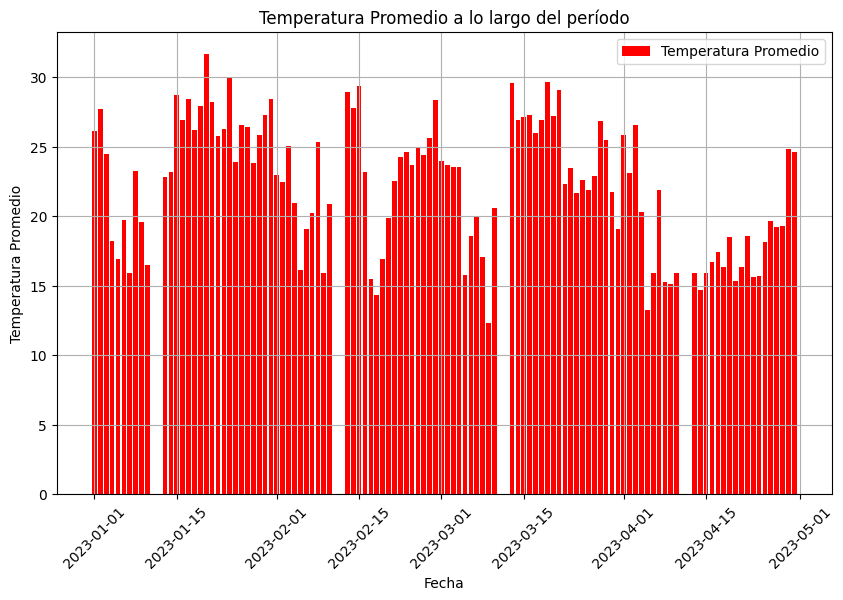

In [ ]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
plt.bar(temp_rioseco3['FECHA'], temp_rioseco3['TPROMEDIO'], label='Temperatura Promedio', color='red')
plt.title('Temperatura Promedio a lo largo del período')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio')
plt.legend()
plt.grid(True)

# Rota las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Muestra el gráfico
plt.show()


<ipython-input-13-60ce96932320>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_rioseco3['PRECIO HELADO POR KG'] = precio_del_kilo_helado


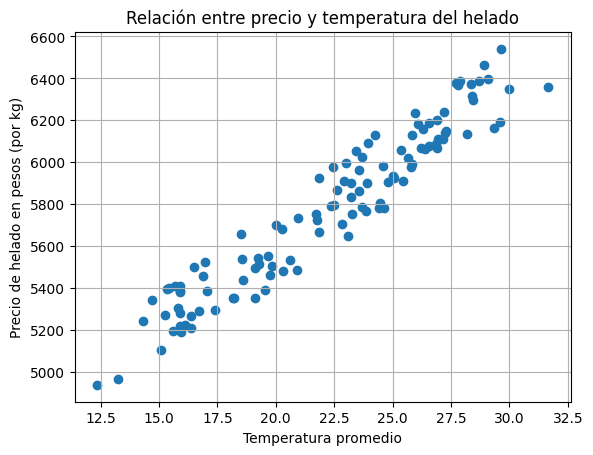


Precio minimo del helado: 4939.0
Precio maximo del helado: 6540.0


In [ ]:
# (Usado posteriormente para el número de números aleatorios a generar):
n_datos_de_rioseco = len(temp_rioseco3)

aumento_helado = 4000*0.02
precio_incial = 4000

# Para que se mantenga la reproductibilidad de los datos aleatorios
np.random.seed(31)

# Genero errores aleatorios para agregar variabilidad a los datos ficticios:
errores_aleatorios = np.random.randint(-200, 200, n_datos_de_rioseco)

# Temperaturas promedio de la ciudad de ushuaia:
temperatura = temp_rioseco3['TPROMEDIO']


# Calculamos los precios usando nuestra función lineal:
precio_del_kilo_helado = aumento_helado  * temperatura + 4000 + errores_aleatorios

# Le mandamos los precios a la columna "Precio helado por kg" etc:
temp_rioseco3['PRECIO HELADO POR KG'] = precio_del_kilo_helado

# Y ahora visualizamos los datinhos:
plt.scatter(temp_rioseco3['TPROMEDIO'], temp_rioseco3['PRECIO HELADO POR KG'])
plt.xlabel("Temperatura promedio")
plt.ylabel("Precio de helado en pesos (por kg)")
plt.title("Relación entre precio y temperatura del helado")
plt.grid(1)
plt.show()


# Imprimo los precios minimos y maximos para determinar el rango de precios:
print(f"\nPrecio minimo del helado: {temp_rioseco3['PRECIO HELADO POR KG'].min()}")
print(f"Precio maximo del helado: {temp_rioseco3['PRECIO HELADO POR KG'].max()}")

In [ ]:
temp_rioseco3

,FECHA,TMAX,TMIN,TPROMEDIO,PRECIO HELADO POR KG
3089,2023-04-10,24.2,7.6,15.90,5282.0
3208,2023-03-10,29.6,11.6,20.60,5535.0
3327,2023-02-10,32.0,9.8,20.90,5488.0
3446,2023-01-10,29.0,4.0,16.50,5502.0
6658,2023-04-09,20.0,10.2,15.10,5106.0
...,...,...,...,...,...
34638,2023-01-13,30.4,15.3,22.85,5706.0
35717,2023-04-01,35.0,16.7,25.85,5991.0
35837,2023-03-01,34.0,13.9,23.95,6094.0
35957,2023-02-01,32.8,13.2,23.00,5997.0


In [ ]:
#AGREGANDO COLUMNA "COMPRA HELADO"
precio_maximo = temp_rioseco3['PRECIO HELADO POR KG'].max()
precio_minimo = temp_rioseco3['PRECIO HELADO POR KG'].min()

precio_inicial = 4000

precio_superior = precio_inicial +  0.4 * precio_inicial

def decision_compra(precio):
  if precio > precio_superior:
    return 0 #NO COMPRA
  elif precio >= precio_inicial:
    return np.random.choice([0, 1], p=[0.2, 0.8])
  else:
    return 1 #SI COMPRA


temp_rioseco3['COMPRA HELADO'] = temp_rioseco3['PRECIO HELADO POR KG'].apply(decision_compra)

temp_rioseco3

<ipython-input-15-0d8ed2d2c3e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_rioseco3['COMPRA HELADO'] = temp_rioseco3['PRECIO HELADO POR KG'].apply(decision_compra)


,FECHA,TMAX,TMIN,TPROMEDIO,PRECIO HELADO POR KG,COMPRA HELADO
3089,2023-04-10,24.2,7.6,15.90,5282.0,0
3208,2023-03-10,29.6,11.6,20.60,5535.0,1
3327,2023-02-10,32.0,9.8,20.90,5488.0,1
3446,2023-01-10,29.0,4.0,16.50,5502.0,1
6658,2023-04-09,20.0,10.2,15.10,5106.0,1
...,...,...,...,...,...,...
34638,2023-01-13,30.4,15.3,22.85,5706.0,0
35717,2023-04-01,35.0,16.7,25.85,5991.0,0
35837,2023-03-01,34.0,13.9,23.95,6094.0,0
35957,2023-02-01,32.8,13.2,23.00,5997.0,0


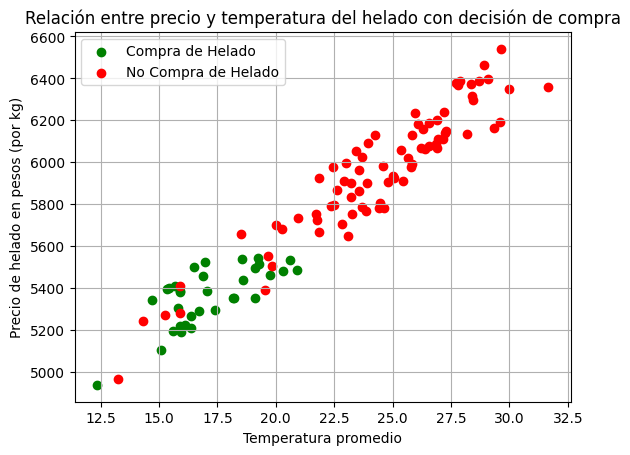

In [ ]:
import matplotlib.pyplot as plt

# Divide los datos en dos grupos: Compra y No Compra
compra_helado = temp_rioseco3[temp_rioseco3['COMPRA HELADO'] == 1]
no_compra_helado = temp_rioseco3[temp_rioseco3['COMPRA HELADO'] == 0]

# Grafica los puntos de compra de helado en verde y los de no compra en rojo
plt.scatter(compra_helado['TPROMEDIO'], compra_helado['PRECIO HELADO POR KG'], c='green', label='Compra de Helado')
plt.scatter(no_compra_helado['TPROMEDIO'], no_compra_helado['PRECIO HELADO POR KG'], c='red', label='No Compra de Helado')
plt.xlabel("Temperatura promedio")
plt.ylabel("Precio de helado en pesos (por kg)")
plt.title("Relación entre precio y temperatura del helado con decisión de compra")
plt.grid(1)
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Función de activación sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Simulación de pesos y umbrales aleatorios
np.random.seed(0)
pesos_perceptron_1 = np.random.rand(2)  # Pesos para el primer perceptrón (temperatura y precio)
pesos_perceptron_2 = np.random.rand(2)  # Pesos para el segundo perceptrón (temperatura y precio)
pesos_perceptron_3 = np.random.rand(2)    # Umbral para el tercer perceptrón
umbral_perceptron_3 = 0.5
# Funciones de activación de los perceptrones
def perceptron_1(temperatura, precio):
    entrada = np.array([temperatura, precio])
    suma_ponderada = np.dot(pesos_perceptron_1, entrada)
    return sigmoid(suma_ponderada)

def perceptron_2(temperatura, precio):
    entrada = np.array([temperatura, precio])
    suma_ponderada = np.dot(pesos_perceptron_2, entrada)
    return sigmoid(suma_ponderada)

def perceptron_3(compra_1, compra_2):
    entrada = np.array([compra_1, compra_2])
    suma_ponderada = np.dot(entrada, pesos_perceptron_3)
    return sigmoid(suma_ponderada)
# Decisión final
def decision_final(temperatura, precio_helado):
    compra_1 = perceptron_1(temperatura, precio_helado)
    compra_2 = perceptron_2(temperatura, precio_helado)
    entrada_perceptron_3 = perceptron_3(compra_1, compra_2)
    suma_ponderada_perceptron_3 = np.dot(umbral_perceptron_3, entrada_perceptron_3)
    compra_final = sigmoid(suma_ponderada_perceptron_3)

    if compra_final > umbral_perceptron_3:
        decision = "COMPRA EL HELADO"
    else:
        decision = "NO COMPRA EL HELADO"

    return decision

# Datos del DataFrame 'temp_rioseco3'
temperaturas = temp_rioseco3['TPROMEDIO']
precios_helado = temp_rioseco3['PRECIO HELADO POR KG']

# Decisiones para cada fila del DataFrame
decisiones = [decision_final(temp, precio) for temp, precio in zip(temperaturas, precios_helado)]

# Agregar las decisiones al DataFrame
temp_rioseco3['Decision'] = decisiones

# Visualizar el DataFrame con las decisiones
print(temp_rioseco3)
# Calcularemos la proporción de las respuestas correctas
# Calcularemos la proporción de las respuestas correctas
exactitud = (temp_rioseco3['Decision'] == temp_rioseco3['COMPRA HELADO']).sum() / len(temp_rioseco3)

print(f"Exactitud de la red neuronal:{exactitud}")


           FECHA  TMAX  TMIN  TPROMEDIO  PRECIO HELADO POR KG  COMPRA HELADO  \
3089  2023-04-10  24.2   7.6      15.90                5282.0              0   
3208  2023-03-10  29.6  11.6      20.60                5535.0              1   
3327  2023-02-10  32.0   9.8      20.90                5488.0              1   
3446  2023-01-10  29.0   4.0      16.50                5502.0              1   
6658  2023-04-09  20.0  10.2      15.10                5106.0              1   
...          ...   ...   ...        ...                   ...            ...   
34638 2023-01-13  30.4  15.3      22.85                5706.0              0   
35717 2023-04-01  35.0  16.7      25.85                5991.0              0   
35837 2023-03-01  34.0  13.9      23.95                6094.0              0   
35957 2023-02-01  32.8  13.2      23.00                5997.0              0   
36077 2023-01-01  32.8  19.4      26.10                6183.0              0   

               Decision  
3089   COMPRA

<ipython-input-51-8682a5feaa5f>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_rioseco3['Decision'] = decisiones


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


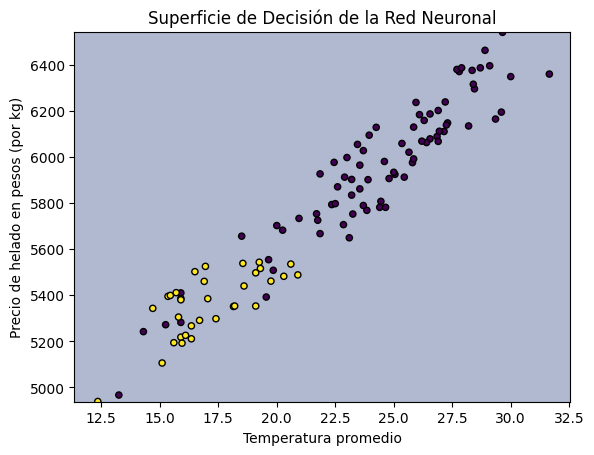

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

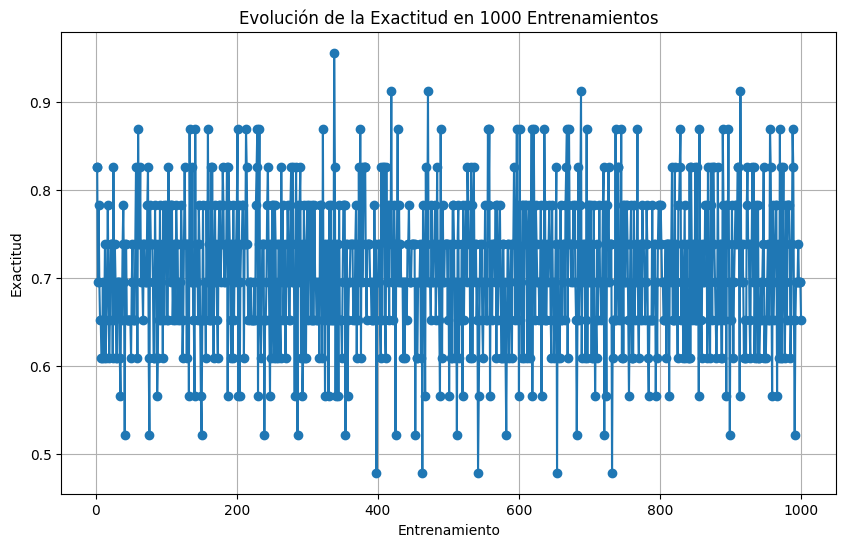

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X = temp_rioseco3[['TPROMEDIO', 'PRECIO HELADO POR KG']].values
y = temp_rioseco3['COMPRA HELADO'].values

# Crear y entrenar un modelo de red neuronal
model = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic', random_state=0)
model.fit(X, y)

# Graficar la superficie de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel("Temperatura promedio")
plt.ylabel("Precio de helado en pesos (por kg)")
plt.title("Superficie de Decisión de la Red Neuronal")
plt.show()

# Número de entrenamientos y divisiones de entrenamiento/prueba
num_entrenamientos = 1000
test_size = 0.2

# Almacenar la exactitud en cada entrenamiento
exactitudes = []

for _ in range(num_entrenamientos):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=np.random.randint(1, 1000))

    # Crear y entrenar un modelo de red neuronal
    model = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic', random_state=0)
    model.fit(X_train, y_train)

    # Calcular la exactitud en el conjunto de prueba
    exactitud = model.score(X_test, y_test)
    exactitudes.append(exactitud)

# Graficar la evolución de la exactitud
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_entrenamientos + 1), exactitudes, marker='o', linestyle='-')
plt.xlabel("Entrenamiento")
plt.ylabel("Exactitud")
plt.title(f"Evolución de la Exactitud en {num_entrenamientos} Entrenamientos")
plt.grid(True)
plt.show()


##CONCLUSIONES

Primera conclusión: El análisis muestra que el precio del helado tiende a aumentar a medida que aumenta la temperatura promedio en la ciudad. Esto sugiere que existe una relación positiva entre la temperatura y el precio del helado.


Segunda conclusión: El análisis muestra que el precio del helado tiende a aumentar a medida que aumenta la temperatura promedio en la ciudad. Esto sugiere que existe una relación positiva entre la temperatura y el precio del helado.


Tercera conclusión: El precio inicial del helado, en este caso, se establece en 4000 pesos. La probabilidad de compra de helado parece estar fuertemente influenciada por este precio base. Si el precio del helado no se aleja demasiado de este precio base, la probabilidad de compra es alta.


Cuarta Conclusión: La red neuronal está compuesta por tres perceptrones interconectados, lo que permite la creación de un modelo de decisión más complejo en comparación con un solo perceptrón. Cada perceptrón se enfoca en diferentes aspectos (temperatura, precio) y contribuye a la decisión final.

Quinta Conclusión: Los perceptrones permiten la implementación de reglas personalizadas para la toma de decisiones. En este caso, el modelo de decisión se basa en reglas que consideran tanto la temperatura como el precio del helado, lo que refleja un enfoque más realista.

Sexta Conclusión: La exactitud de la red neuronal se calcula comparando las decisiones del modelo con los valores reales de compra de helado en el DataFrame. Esta métrica indica qué tan bien se ajusta el modelo a los datos de entrenamiento. En este caso, la exactitud de la red neuronal se muestra como un indicador de su rendimiento.

En nuestro caso hemos realizado la exactitud de la red neuronal mediante 2 metodos, en el manual la exactitud nos arrojo un 0.0 de exactitud por lo cual tambien lo hicimos con el uso de algunas librerias a ver si nos arrojaba un resultado diferente y al ver el grafico podemos observar que esta varia mientras mayor sea el numero de entrenamientos espcificos.